<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning/blob/main/photo_recogn_with_name_face_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=0b9b2cf4bd3eb40f5e97454c66e80e04f7b83f540c90903c09b5873364757bcd
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
!mkdir known
!wget https://upload.wikimedia.org/wikipedia/commons/f/fc/Bill_Gates_-_2023_-_P062021-967902_%28cropped%29.jpg
!wget https://www.nmspacemuseum.org/wp-content/uploads/2019/03/Elon_Musk.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/8/8d/President_Barack_Obama.jpg

--2024-08-05 08:45:10--  https://upload.wikimedia.org/wikipedia/commons/f/fc/Bill_Gates_-_2023_-_P062021-967902_%28cropped%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 890024 (869K) [image/jpeg]
Saving to: ‘Bill_Gates_-_2023_-_P062021-967902_(cropped).jpg’

Bill_Gates_-_2023_- 100%[===================>] 869.16K  --.-KB/s    in 0.03s   

2024-08-05 08:45:10 (29.5 MB/s) - ‘Bill_Gates_-_2023_-_P062021-967902_(cropped).jpg’ saved [890024/890024]

--2024-08-05 08:45:10--  https://www.nmspacemuseum.org/wp-content/uploads/2019/03/Elon_Musk.jpg
Resolving www.nmspacemuseum.org (www.nmspacemuseum.org)... 164.64.52.29
Connecting to www.nmspacemuseum.org (www.nmspacemuseum.org)|164.64.52.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239507 (234K) [image/jpeg]
Sav

In [3]:
!mkdir unknown
!wget https://i.insider.com/5ddfa893fd9db26b8a4a2df7 -O unknown/1.jpg
!wget https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg -O unknown/2.jpg
!wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O unknown/3.jpg
#!wget https://specials-images.forbesimg.com/imageserve/1184274010/960x0.jpg -O unknown/4.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/5/56/Donald_Trump_official_portrait.jpg

--2024-08-05 08:46:39--  https://i.insider.com/5ddfa893fd9db26b8a4a2df7
Resolving i.insider.com (i.insider.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to i.insider.com (i.insider.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2324104 (2.2M) [image/png]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]   2.22M  --.-KB/s    in 0.03s   

2024-08-05 08:46:39 (71.6 MB/s) - ‘unknown/1.jpg’ saved [2324104/2324104]

--2024-08-05 08:46:39--  https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg
Resolving cdn-images-1.medium.com (cdn-images-1.medium.com)... 162.159.153.4, 162.159.152.4, 2606:4700:7::a29f:9904, ...
Connecting to cdn-images-1.medium.com (cdn-images-1.medium.com)|162.159.153.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /v2/resize:fit:1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg [following]
--2024-08-05 08:46:39--  https://cdn-image

#import necessary library

In [4]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow



In [5]:
def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))


known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])
known_encodings

[array([-1.07939951e-01,  1.06336623e-01,  5.49463406e-02,  3.92014384e-02,
        -1.76778287e-01, -7.64214247e-03, -5.09680472e-02, -1.13989688e-01,
         1.12229541e-01, -9.08213258e-02,  1.68536216e-01,  4.21739593e-02,
        -2.19067857e-01, -5.24918735e-03, -3.02822813e-02,  1.10094987e-01,
        -1.26769423e-01, -2.46092901e-02, -1.32344425e-01, -1.06581792e-01,
        -4.84205261e-02,  5.54294921e-02,  7.70009905e-02, -4.16649729e-02,
        -1.33201003e-01, -2.49309868e-01, -1.04316033e-01, -1.07950598e-01,
         1.49760589e-01, -3.93892080e-02,  1.91104487e-02,  6.02805465e-02,
        -1.50028780e-01, -3.98932919e-02,  3.54877040e-02,  1.31639943e-01,
        -7.09487125e-02,  6.23767078e-03,  2.50728548e-01, -3.82122286e-02,
        -2.01613367e-01,  8.00537020e-02,  8.55605453e-02,  2.29464501e-01,
         2.45231584e-01, -4.09801677e-03,  1.05973585e-02, -3.51377726e-02,
         1.17911771e-01, -1.90487921e-01,  8.49721879e-02,  1.54910386e-01,
         1.7

In [7]:
unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    (face_recognition.face_distance(known_encodings, img_enc))




Processing 1.jpg
[0.74596539 0.82021021 0.49007858]
Processing 3.jpg
[0.44996625 0.84627044 0.82688828]
Processing 4.jpg
[0.67054519 0.81395666 0.76961148]
Processing 2.jpg
[0.95589886 0.74598209 0.85894116]


In [10]:
unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    for i in range (len(results)):
        if results[i]:
            name = known_names[i]
    print(name)


Processing 1.jpg
Elon_Musk
Processing 3.jpg
Bill_Gates
Processing 4.jpg
Bill_Gates
Processing 2.jpg
Bill_Gates


Processing 1.jpg


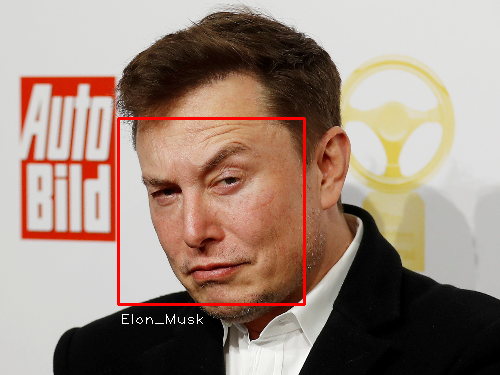

Processing 3.jpg


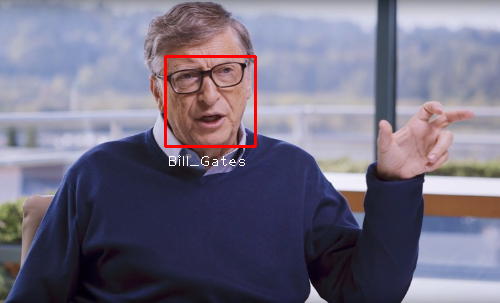

Processing 4.jpg
Processing 2.jpg


In [13]:
unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    # print(face_recognition.face_distance(known_encodings, img_enc))

    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
            cv2_imshow(img)


In above result...processing1, and 3 only show the output. because these two image only matches for the above know faces. then balance two images are not recognition. because that faces is not train by the model.